# Practice 2 - Text Classification with CNN

## 실습2

## Dataset Load

In [112]:
from tensorflow.keras.datasets import imdb # 영화 리뷰를 긍/부정으로 분류하는 데이터 셋 / 토근들을 다 아이디 값으로 바꿀건데 거기 안에 들어있는 상위 1000개의 빈도수가 높은 단어들만 가져옴
max_features = 1000 # 등장 빈도 순위가 1~1,000에 해당하는 단어만 사용
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

* y_train : 1 : 긍정
* y_train : 0 : 부정        

In [113]:
# 토큰으로 전처리 된 IMDB 데이터셋 / 숫자 하나하나가 단어 토큰을 id화해서 리스트에 넣은 것
print(len(x_train))
print(len(x_test))

print(x_train[0])
print(len(x_train[0]))
print(y_train[0])
print()
print(x_train[1])
print(y_train[1])

25000
25000
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218
1

[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5

In [114]:
for i in range(0, 25000):
    if(len(x_train[i]) == 2494):
        print((i))

17934


In [115]:
len(x_train[17934])

2494

In [116]:
# 토큰의 길이가 문장의 길이마다 다르기 때문에 가장 긴 값이 무엇인지 체크!
max_len = 0
for x in x_train:
    if len(x) > max_len:
        max_len = len(x)
print(max_len)

2494


## Padding

In [117]:
# 토큰의 길이가 문장의 길이마다 다르기 때문에 최대 길이 값을 기준으로 이보다 짧은 값들은 0으로 패딩 처리 해준다.
# 문장의 토큰 길이가 max_len 이상인 경우 300만 이용.
from tensorflow.keras.preprocessing import sequence
max_len = 300
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [118]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,  14,  22,  16,  43, 530, 973,   2,   2,
        65, 458,   2,  66,   2,   4, 173,  36, 256,   5,  25, 100,  43,
       838, 112,  50, 670,   2,   9,  35, 480, 284,   5, 150,   4, 172,
       112, 167,   2, 336, 385,  39,   4, 172,   2,   2,  17, 546,  38,
        13, 447,   4, 192,  50,  16,   6, 147,   2,  19,  14,  22,   4,
         2,   2, 469,   4,  22,  71,  87,  12,  16,  43, 530,  38,  76,
        15,  13,   2,   4,  22,  17, 515,  17,  12,  16, 626,  18,   2,
         5,  62, 386,  12,   8, 316,   8, 106,   5,   4,   2,   

In [119]:
x_train[17934] # 제일 긴 리뷰는 패딩이 없구나

array([  8,   2,   2,   2,   6,   2,   2,   2,   2,   2,   2,  23,   4,
         2,   2,   4, 741,   2, 309,  56,  43,  11,  58,   8, 989,  56,
         6,   2, 589,  23,   2,   2,   2,   2, 741,  19,   6,   2,   5,
       270,  90,  56,  18,   6,   2,   2, 805,   2,  56,  19,   6,   2,
         2,  21,   2,   2,  23,   8,  15,   2,   5,   2,  12,  46,   7,
        27, 957,   4,   2, 188,   2,  11,   4,   2, 968,   5, 161,  67,
         2,   2,   2, 710,  19,   6,   2,   2,   2, 435,   8,   2,   2,
        17,   4, 741,   2,   2,  21,   4, 351, 132, 820, 188,  27,   2,
        56,   2, 805,   8,   2, 741,  21,  29,  99,   2,  46,   4, 741,
       188,  56,   5,   2,   2,  11,   4,   2,   2, 610,  40,  29,  16,
        44,   8,   2,  21,   2,   2,   4, 741,  46,   7,   4,   2,   2,
         2,   2, 741,  56,   5,   2,  90,  19,   4, 236,   2, 137,   4,
       351, 132,   2,  90,  18,   4,   2,   2,   2,  11,   5,   2,   2,
        56,  11,   4,   2,   2,   2, 435,   2,  19,   2,  21,   

In [120]:
cnt = 0 
for i in range(300):
    if(x_train[17934][i])==0:
        cnt+=1
if cnt == 0:
    print("no zero")

no zero


## Y label data One hot encoding

In [121]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [122]:
print(y_train.shape)
print(y_train_one_hot.shape)

(25000,)
(25000, 2)


In [123]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [124]:
y_train_one_hot

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [125]:
import pandas as pd
pd.DataFrame(y_train_one_hot).value_counts()

0    1  
0.0  1.0    12500
1.0  0.0    12500
Name: count, dtype: int64

* y_train -> y_train_one_hot
* 1          [0,1]
* 0          [1,0]

In [126]:
print(y_train_one_hot[0])
print(y_test_one_hot[1])

[0. 1.]
[0. 1.]


## Model Build

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_shape=(max_len,)))
model.add(layers.Conv1D(32, 7, strides=1, activation='relu')) 
model.add(layers.MaxPool1D(5)) 
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 300, 128)       │       128,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 294, 32)        │        28,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 58, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1856)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        59,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,194 (844.51 KB)

 Trainable params: 216,194 (844.51 KB)

 Non-trainable params: 0 (0.00 B)

## Training Setup

In [128]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

# early stopping 적용
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# local에 저장하고 싶을 경우 이용
#checkpoint_filepath = './temp/checkpoint'
#mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', save_weights_only=True, save_best_only=True)

# optimizer에 필요한 옵션 적용
# loss와 평가 metric 적용
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


## Training !

In [129]:
history = model.fit(x_train, y_train_one_hot, epochs=3, batch_size=128, validation_split=0.2, callbacks=[es])

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 163ms/step - accuracy: 0.5437 - loss: 0.6818 - val_accuracy: 0.7556 - val_loss: 0.5079
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 171ms/step - accuracy: 0.7751 - loss: 0.4821 - val_accuracy: 0.7310 - val_loss: 0.5965
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.8366 - loss: 0.3702 - val_accuracy: 0.7812 - val_loss: 0.4980


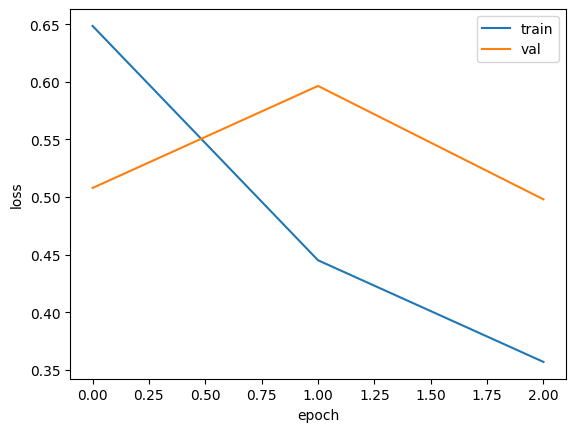

In [130]:
# Training history plot

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## Test

In [131]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7762 - loss: 0.5058


In [132]:
print("Loss:", test_loss)
print("Accuracy:", test_acc)

Loss: 0.4981670677661896
Accuracy: 0.7809200286865234


# 과제 2

## Data Load

In [70]:
import pandas as pd
import numpy as np

with open('/kaggle/input/2024-1-nlp-2/Korean_movie_reviews_2016.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t') for doc in f]
    docs = [(doc[0], int(doc[1])) for doc in docs if len(doc) == 2]
    texts, labels = zip(*docs)

In [71]:
for i in range(3):
    print(i)
    print(texts[i])
    print(labels[i])
    print()

0
부산 행 때문 너무 기대하고 봤
0

1
한국 좀비 영화 어색하지 않게 만들어졌 놀랍
1

2
조금 전 보고 왔 지루하다 언제 끝나 이 생각 드
0



In [72]:
print(len(texts))
print(len(labels))

165384
165384


## 1. Text Preprocessing - Text to Word Index ID

In [73]:
words_list = [doc.strip().split() for doc in texts]
print(words_list[:3])

[['부산', '행', '때문', '너무', '기대하고', '봤'], ['한국', '좀비', '영화', '어색하지', '않게', '만들어졌', '놀랍'], ['조금', '전', '보고', '왔', '지루하다', '언제', '끝나', '이', '생각', '드']]


In [74]:
# total text tokens
total_words = []
for words in words_list:
    total_words.extend(words)
    
from collections import Counter
c = Counter(total_words)

# 빈도를 기준으로 상위 10000개의 단어들만 선택
max_features = 10000
common_words = [word for word, count in c.most_common(max_features)]

In [75]:
common_words[:10] # 많이 나오는 단어 순위

['영화', '너무', '봤', '좋', '진짜', '정말', '보고', '연기', '평점', '스토리']

In [76]:
len(common_words)

10000

In [77]:
# 각 단어에 대해서 index 생성하기
# 각 index에 대해서 단어 기억하기
words_dic = {}
#Write your code
index = 1
for word in common_words:
    if word not in words_dic:
        words_dic[word] = index
        index += 1
print(dict(list(words_dic.items())[:10]))

{'영화': 1, '너무': 2, '봤': 3, '좋': 4, '진짜': 5, '정말': 6, '보고': 7, '연기': 8, '평점': 9, '스토리': 10}


In [78]:
max_len=0
for i in range(len(words_list)):
    if len(words_list[i]) > max_len:
        max_len = len(words_list[i])
        max_idx = i
print(max_len)

92


In [79]:
for i in range(len(words_list)):
    if len(words_list[i]) == 92:
        print(i)

35184


In [80]:
words_list[:3]

[['부산', '행', '때문', '너무', '기대하고', '봤'],
 ['한국', '좀비', '영화', '어색하지', '않게', '만들어졌', '놀랍'],
 ['조금', '전', '보고', '왔', '지루하다', '언제', '끝나', '이', '생각', '드']]

In [81]:
labels[:3]

(0, 1, 0)

In [82]:
# 각 문서를 상위 10000개 단어들에 대해서 index 번호로 표현하기
#Write your code
words_list_index = []
for sent in words_list:
    sent_index = []
    for word in sent:
        if word in words_dic:
            sent_index.append(words_dic[word])
    words_list_index.append(sent_index)

print(words_list_index[:3])

filtered_indexed_words = words_list_index

[[204, 249, 121, 2, 345, 3], [112, 52, 1, 3091, 1077, 2968, 1942], [285, 203, 7, 100, 756, 552, 1158, 12, 37, 1393]]


In [83]:
words_list_index[:3]

[[204, 249, 121, 2, 345, 3],
 [112, 52, 1, 3091, 1077, 2968, 1942],
 [285, 203, 7, 100, 756, 552, 1158, 12, 37, 1393]]

## 2. Dataset Preparation for CNN models

In [19]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

#Write your code
# 2.1 X - input data 처리 (text tokens id_index to padded X)
max_len = 92
x = sequence.pad_sequences(filtered_indexed_words, maxlen=max_len)

# 2.2 y - label data 처리 (one_hot_encoded y)
y = to_categorical(labels)

2024-04-11 06:05:38.987968: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 06:05:38.988119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 06:05:39.188783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
for i in range(len(filtered_indexed_words)):
    if len(filtered_indexed_words[i]) == 92:
        break
print(i)

35184


In [21]:
x[35184]

array([1143,   42,  246,   42, 1143,   42,  246,   42, 1143,   42,  246,
         42, 1143,   42,  246,   42, 1143,   42,  246,   42, 1143,   42,
        246,   42, 1143,   42,  246,   42, 1143,   42,  246,   42, 1143,
         42,  246,   42, 1143,   42,  246,   42, 1143,   42,  246,   42,
       1143,   42,  246,   42, 1143,   42,  246,   42, 1143,   42,  246,
         42, 1143,   42,  246,   42, 1143,   42,  246,   42, 1143,   42,
        246,   42, 1143,   42,  246,   42, 1143,   42,  246,   42, 1143,
         42,  246,   42, 1143,   42,  246,   42, 1143,   42,  246,   42,
       1143,   42,  246,   42], dtype=int32)

In [22]:
pd.DataFrame(y).value_counts()

0    1  
0.0  1.0    86806
1.0  0.0    78578
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
#Write your code
# 2.3 Train / Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [24]:
print(x_train[0])
print(y_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 188   7
   2 113]
[1. 0.]


## 3. Model Build & Setting

In [29]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
#Write your code - model build
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

model.add(layers.Embedding(max_features, 128, input_shape=(max_len,)))
model.add(layers.SpatialDropout1D(0.7))
model.add(layers.Bidirectional(layers.LSTM(64, kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l1(0.01))))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 92, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 92, 128)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,383,010 (5.28 MB)

 Trainable params: 1,383,010 (5.28 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam # you can add more optimizers

#Write your code - model setting

# early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# optimizer에 필요한 옵션 적용
# loss와 평가 metric 적용
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## 4. Model Training

In [31]:
#Write your code - model training
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, callbacks=[es])

Epoch 1/3
931/931 ━━━━━━━━━━━━━━━━━━━━ 168s 176ms/step - accuracy: 0.7656 - loss: 2.1868 - val_accuracy: 0.8818 - val_loss: 0.4104
Epoch 2/3
931/931 ━━━━━━━━━━━━━━━━━━━━ 200s 174ms/step - accuracy: 0.8910 - loss: 0.3301 - val_accuracy: 0.8900 - val_loss: 0.3003
Epoch 3/3
931/931 ━━━━━━━━━━━━━━━━━━━━ 203s 175ms/step - accuracy: 0.8984 - loss: 0.2953 - val_accuracy: 0.8896 - val_loss: 0.2998


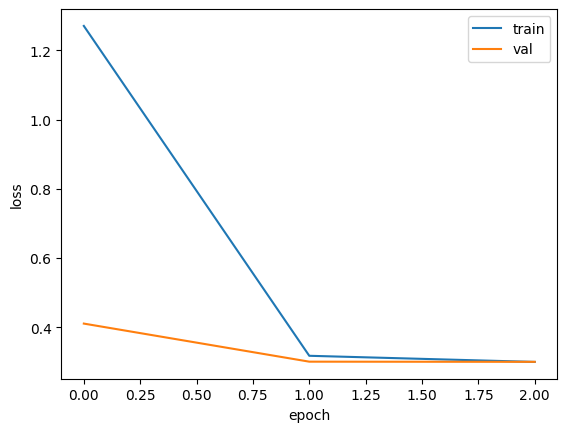

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 5. Test Model

In [33]:
test_loss, test_acc = model.evaluate(x_test,y_test)

517/517 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8917 - loss: 0.3038


In [34]:
print("Loss:", test_loss)
print("Accuracy:", test_acc)

Loss: 0.29784777760505676
Accuracy: 0.8925569653511047


## 6. Model Inference

In [155]:
#원래 리뷰로 돌리기
indices = x_test[3]
words = []
for index in indices:
    if index != 0:
        word = [key for key, value in words_dic.items() if value == index][0]
        words.append(word)

print('영화 리뷰 :',' '.join(words))
print()

# 데이터 하나 모델에 넣어서 돌리기
pred = model.predict(np.array([x_test[3]]))
porn = np.argmax(pred[0])

if (porn) == 1:
    print('모델의 예측 : 긍정') 
else:
    print('모델의 예측 : 부정')
print()

if (y_test[3][0]) == 0: #[0. 1.] : 긍정
    print('실제 정답 : 긍정') 
else: #[1. 0.] : 긍정
    print('실제 정답 : 부정')

영화 리뷰 : 정말 국가대표 비교 되는 영화 다양한 촬영 기법 스펙 타 클 표현했 한정된 소재 실제 인물 이야기 영화 시간 내내 지루할 틈 나가는 연출 주연 배우 연기 감동 최고

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
모델의 예측 : 긍정

실제 정답 : 긍정
